## Question 1

In [14]:
import pickle
import pandas as pd
import os

In [2]:
# Load the model and vectorizer from the binary file
with open('model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

c:\Users\User\miniconda3\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DictVectorizer from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\User\miniconda3\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
# Define the categorical columns
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    return df

In [4]:
# Read the data
df = read_data("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet")

In [5]:
# Prepare the data for prediction
dicts = df[categorical].to_dict(orient='records')
X_val = dv.transform(dicts)
y_pred = model.predict(X_val)

In [8]:
# Print the standard deviation of the predicted durations
print("Standard deviation of predicted durations:", round(y_pred.std(),2))

Standard deviation of predicted durations: 6.25


## Question 2

In [12]:
output_file = f"predicted_duration_2023_03.parquet"

# Read the data for March 2023
year = 2023
month = 3

df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')

df_result = pd.DataFrame()
df_result['ride_id'] = df['ride_id']
df_result['predicted_duration'] = y_pred

df_result.to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)

In [15]:
# Check the size of the output file
file_size = os.path.getsize(output_file)
print(f'Size of the output file: {file_size / (1024 * 1024):.2f} MB')

Size of the output file: 65.46 MB


## Question 3

jupyter nbconvert --to script hw4.ipynb

## Question 4

sha256:014e07a23fe02e65f9392898143c542a50b6001dbe89cb867e19688e468d049b

## Question 5

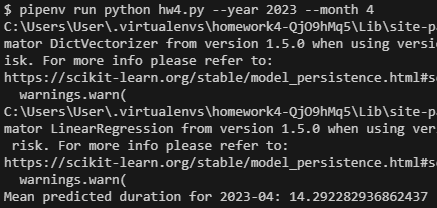

## Question 6